# Estimate the annual fuel and maintenance costs of each vehicle

We have merged or imputed the gas mileage of each vehicle in the dataset. Now convert this to an estimate of how much the fuel for the vehicle costs annually, using data from the EIA.

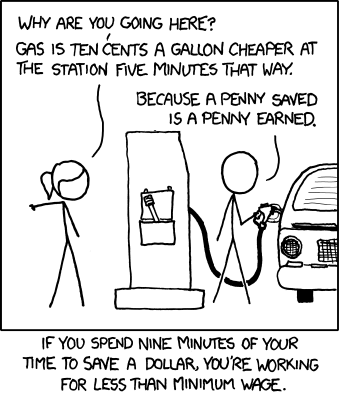
(once again from [xkcd](https://xkcd.com/951/))

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textlog import textSetup
text = textSetup(prefix='FuelCost: ')
import json

YEAR = '2017' # What year to use for vehicle operating costs?

In [2]:
# EIA produces thousands of "series" on petroleum prices. Specify which series we want for each vehicle
gasSeries = (
    ('HHSTATE', ('ID', 'MT', 'WY', 'UT', 'CO'), "PET.EMM_EPMR_PTE_R40_DPG.A"),
    ('HHSTATE', ('AK', 'HI', 'WA', 'OR', 'NV', 'AZ'), "PET.EMM_EPMR_PTE_R5XCA_DPG.A"), # Special PADD zone 5 without California
    ('HHSTATE', ('MA', 'CT', 'RI', 'VT', 'NH', 'ME'), "PET.EMM_EPMR_PTE_R1X_DPG.A"),
    ('HHSTATE', ('NY', 'PA', 'NJ', 'DE', 'MD', 'DC'), "PET.EMM_EPMR_PTE_R1Y_DPG.A"),
    ('HHSTATE', ('WV', 'VA', 'NC', 'SC', 'GA', 'FL'), "PET.EMM_EPMR_PTE_R1Z_DPG.A"),
    ('HHSTATE', ('ND', 'SD', 'NE', 'KS', 'OK', 'MN', 'IA', 'MO', 'WI', 'IL', 'IN', 'MI', 'OH', 'KY', 'TN'), "PET.EMM_EPMR_PTE_R20_DPG.A"),
    ('HHSTATE', ('NM', 'TX', 'LA', 'AR', 'MS', 'AL'), "PET.EMM_EPMR_PTE_R30_DPG.A"),
    
    # Individual state series
    ('HHSTATE', ('CA',), "PET.EMM_EPMR_PTE_SCA_DPG.A"),
    ('HHSTATE', ('CO',), "PET.EMM_EPMR_PTE_SCO_DPG.A"),
    ('HHSTATE', ('FL',), "PET.EMM_EPMR_PTE_SFL_DPG.A"),
    ('HHSTATE', ('MA',), "PET.EMM_EPMR_PTE_SMA_DPG.A"),
    ('HHSTATE', ('NY',), "PET.EMM_EPMR_PTE_SNY_DPG.A"),
    ('HHSTATE', ('OH',), "PET.EMM_EPMR_PTE_SOH_DPG.A"),
    ('HHSTATE', ('TX',), "PET.EMM_EPMR_PTE_STX_DPG.A"),
    ('HHSTATE', ('MN',), "PET.EMM_EPMR_PTE_SMN_DPG.A"),
    ('HHSTATE', ('WA',), "PET.EMM_EPMR_PTE_SWA_DPG.A"),
    
    # Metro area series
    # TODO
)

dieselSeries = (
    ('HHSTATE', ('ID', 'MT', 'WY', 'UT', 'CO'), "PET.EMD_EPD2D_PTE_R40_DPG.A"),
    ('HHSTATE', ('AK', 'HI', 'WA', 'OR', 'NV', 'AZ'), "PET.EMD_EPD2D_PTE_R5XCA_DPG.A"), # Special PADD zone 5 without California
    ('HHSTATE', ('MA', 'CT', 'RI', 'VT', 'NH', 'ME'), "PET.EMD_EPD2D_PTE_R1X_DPG.A"),
    ('HHSTATE', ('NY', 'PA', 'NJ', 'DE', 'MD', 'DC'), "PET.EMD_EPD2D_PTE_R1Y_DPG.A"),
    ('HHSTATE', ('WV', 'VA', 'NC', 'SC', 'GA', 'FL'), "PET.EMD_EPD2D_PTE_R1Z_DPG.A"),
    ('HHSTATE', ('ND', 'SD', 'NE', 'KS', 'OK', 'MN', 'IA', 'MO', 'WI', 'IL', 'IN', 'MI', 'OH', 'KY', 'TN'), "PET.EMD_EPD2D_PTE_R20_DPG.A"),
    ('HHSTATE', ('NM', 'TX', 'LA', 'AR', 'MS', 'AL'), "PET.EMD_EPD2D_PTE_R30_DPG.A"),
    
    ('HHSTATE', ('CA',), "PET.EMD_EPD2D_PTE_SCA_DPG.A"),
)

usGas = "PET.EMM_EPMR_PTE_NUS_DPG.A"
usDiesel = "PET.EMD_EPD2D_PTE_NUS_DPG.A"

In [3]:
allSeries = set([*[s[2] for s in gasSeries], *[s[2] for s in dieselSeries], usGas, usDiesel])

# Read EIA data
eia = dict()
with open('../data/PET.txt') as inp:
    for line in inp:
        series = json.loads(line)
        if 'series_id' in series and series['series_id'] in allSeries:
            eia[series['series_id']] = series

In [4]:
for fuel, series in (('Gasoline', gasSeries), ('Diesel', dieselSeries)):
    print(fuel)
    for key, states, ser in series:
        print(f'{", ".join(states)}: {eia[ser]["name"]}')
    print()

Gasoline
ID, MT, WY, UT, CO: Rocky Mountain Regular All Formulations Retail Gasoline Prices, Annual
AK, HI, WA, OR, NV, AZ: West Coast (PADD 5) Except California Regular All Formulations Retail Gasoline Prices, Annual
MA, CT, RI, VT, NH, ME: New England (PADD 1A) Regular All Formulations Retail Gasoline Prices, Annual
NY, PA, NJ, DE, MD, DC: Central Atlantic (PADD 1B) Regular All Formulations Retail Gasoline Prices, Annual
WV, VA, NC, SC, GA, FL: Lower Atlantic (PADD 1C) Regular All Formulations Retail Gasoline Prices, Annual
ND, SD, NE, KS, OK, MN, IA, MO, WI, IL, IN, MI, OH, KY, TN: Midwest Regular All Formulations Retail Gasoline Prices, Annual
NM, TX, LA, AR, MS, AL: Gulf Coast Regular All Formulations Retail Gasoline Prices, Annual
CA: California Regular All Formulations Retail Gasoline Prices, Annual
CO: Colorado Regular All Formulations Retail Gasoline Prices, Annual
FL: Florida Regular All Formulations Retail Gasoline Prices, Annual
MA: Massachusetts Regular All Formulations Re

In [5]:
vehicles = pd.read_csv('../data/vehicles_fuel_economy_value_imputed.csv', low_memory=False)

In [6]:
def computeFuelPrice (vehicle):
    series = None
    # assume that hybrids run on gas
    gas = vehicle.fuel == 'Gasoline' or (vehicle.fuel == 'Hybrid/alternative' and vehicle.hybrid)
    if gas:
        series = gasSeries
    elif vehicle.fuel == 'Diesel':
        series = dieselSeries
    else:
        return np.nan # some other fuel

    # get the appropriate series id
    sid = None
    
    for key, values, seriesId in series:
        if vehicle[key] in values:
            sid = seriesId
            # don't break, there might be a more specific rule later (e.g. state or metro area)
    
    if sid == None:
        sid = usGas if gas else usDiesel
        print(f'{vehicle.fuel} vehicle in {vehicle.HHSTATE} has no specific fuel series, using US average')
    
    return [price for year, price in eia[sid]['data'] if year == YEAR][0]

vehicles['fuelPrice'] = vehicles.apply(computeFuelPrice, 1)
text('Computed fuel cost')

<Response [201]>

In [7]:
vehicles['fuelCost'] = vehicles.fuelPrice / vehicles.combined_imputed * vehicles.BESTMILE
vehicles['maintenanceTireCost'] = vehicles.BESTMILE * 0.08

In [8]:
vehicles.to_csv('../data/vehicles_fuel_costs.csv')

Text(0.5,0,'Dollars')

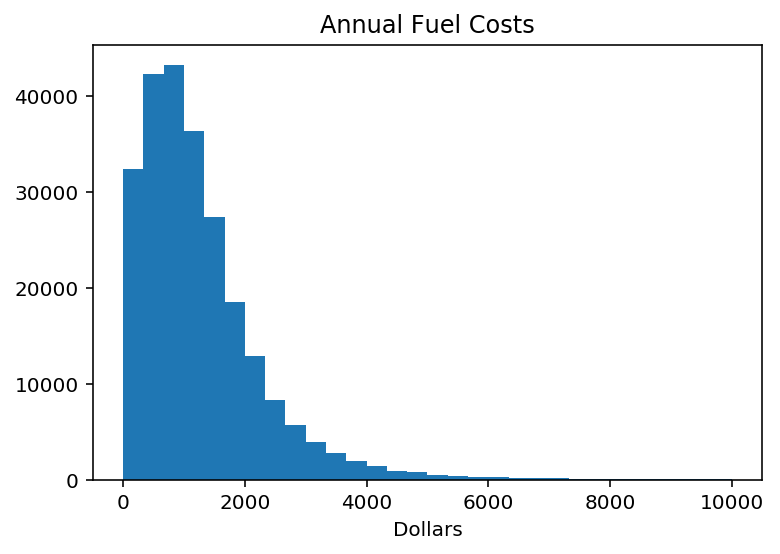

In [9]:
plt.hist(vehicles.fuelCost.dropna(), range=(0,10000), bins=30)
plt.title('Annual Fuel Costs')
plt.xlabel('Dollars')

(0, 20000)

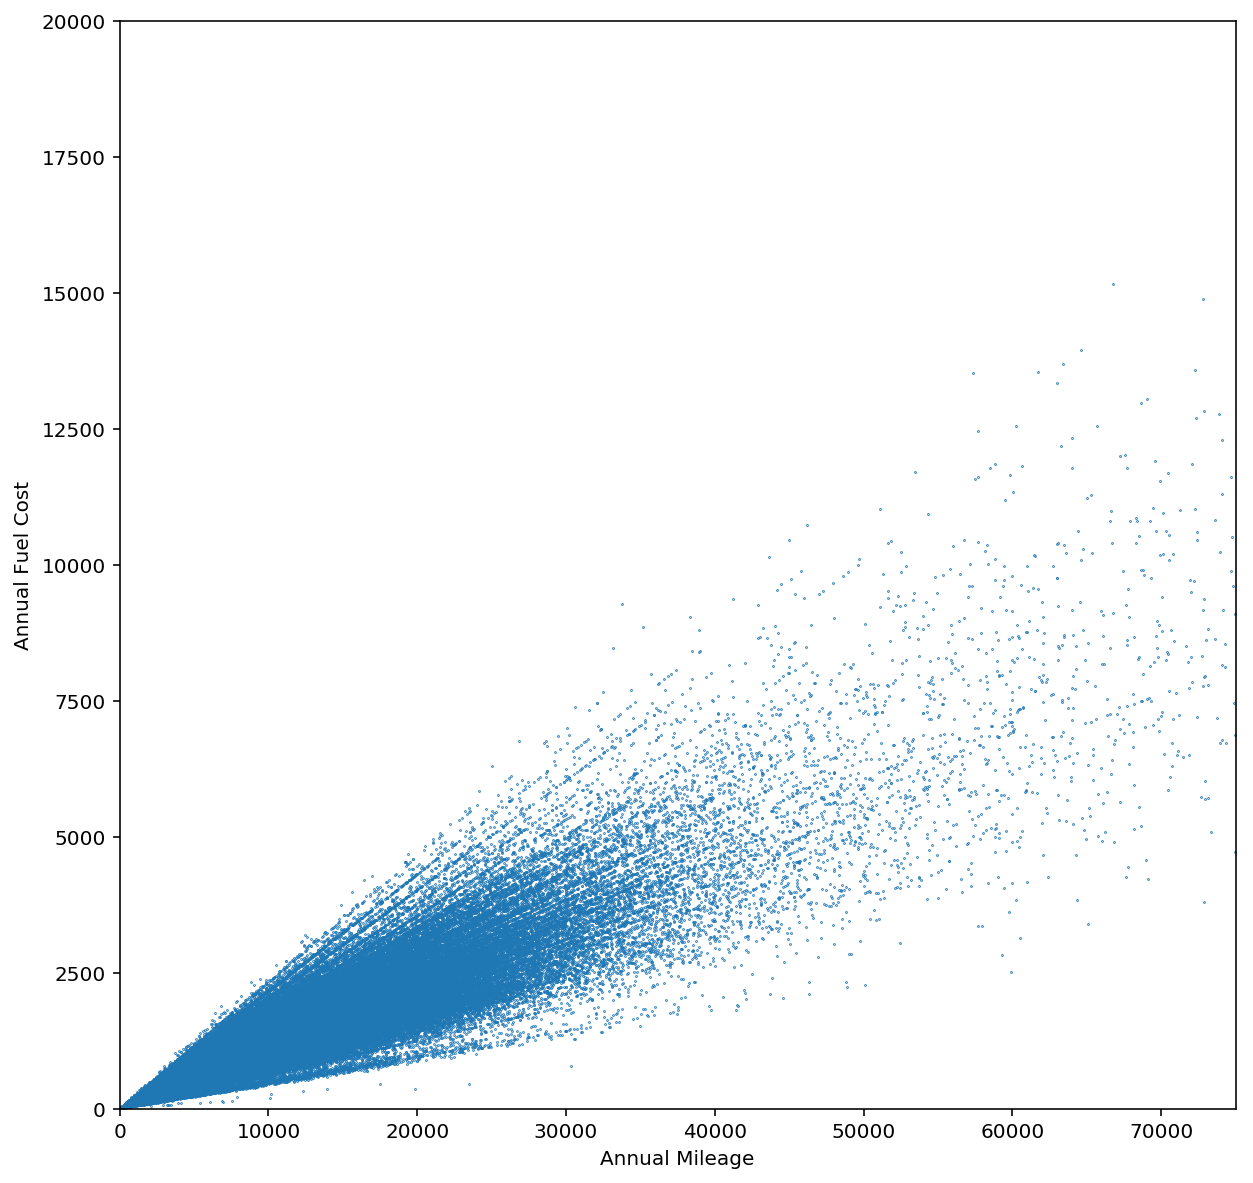

In [10]:
plt.figure(figsize=(10, 10))
plt.scatter(vehicles.BESTMILE, vehicles.fuelCost, marker='.', s=0.5)
plt.xlabel('Annual Mileage')
plt.ylabel('Annual Fuel Cost')
plt.xlim(0, 75000)
plt.ylim(0, 20000)


In [ ]:
np.sum(pd.isnull(vehicles.combined)) / len(vehicles)